<h1 align="center">CHICAGO CRIME ANALYTICS</h1>
<h3 align="center">Analyst: Marianne Mae S. Capuno</h3>
<hr>

<h1 style="font-style: italic;">Import Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

<h1 style="font-style: italic;">Load Dataset into DataFrame</h1>

In [2]:
df = pd.read_csv('datasets\\chicago_2001_present.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


<h1 style="font-style: italic;">Check DataFrame Information</h1>

In [3]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410198 entries, 0 to 8410197
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

<h1 style="font-style: italic;">Check for missing values</h1>

In [4]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

<h1 style="font-style: italic;">Filling up missing values</h1>

In [5]:
df['Location Description'] = df['Location Description'].fillna('Unknown')

df['District'] = df['District'].fillna(-1).astype(int)
df['Ward'] = df['Ward'].fillna(-1).astype(int)

df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])  # use most common value
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].median())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].median())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())

df['Location'] = df['Location'].fillna('(0,0)')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.day_name()
df['hour'] = df['Date'].dt.hour

categories = [
    'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'District', 'Ward',
    'Community Area', 'FBI Code', 'year', 'month', 'dayofweek', 'hour'
]
for col in categories:
    df[col] = df[col].astype('category')
    
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
year                    0
month                   0
day                     0
dayofweek               0
hour                    0
dtype: int64

<h1 align = "center">Exploratory Data Analysis (EDA)</h1>
<hr>

<h2 style="font-style: italic;">I. Total crimes per year</h2>

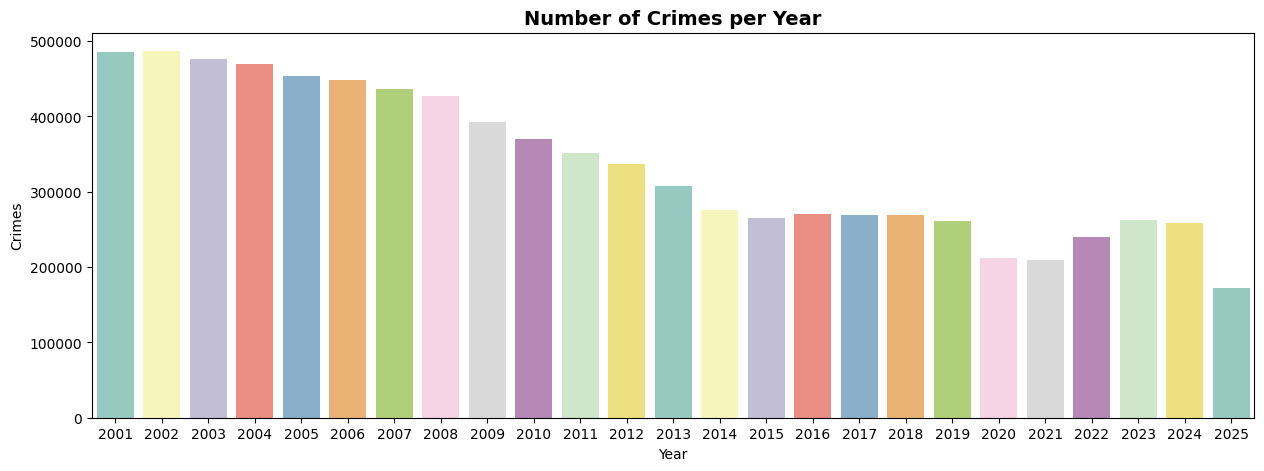

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='year', palette="Set3")
plt.title("Number of Crimes per Year", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crime incidents peaked in the early 2000s but show a downward trend over the past decade, suggesting long-term crime reduction strategies in Chicago have had measurable impact.</h3>
<hr>

<h2 style="font-style: italic;">II. Crimes by day of the week</h2>

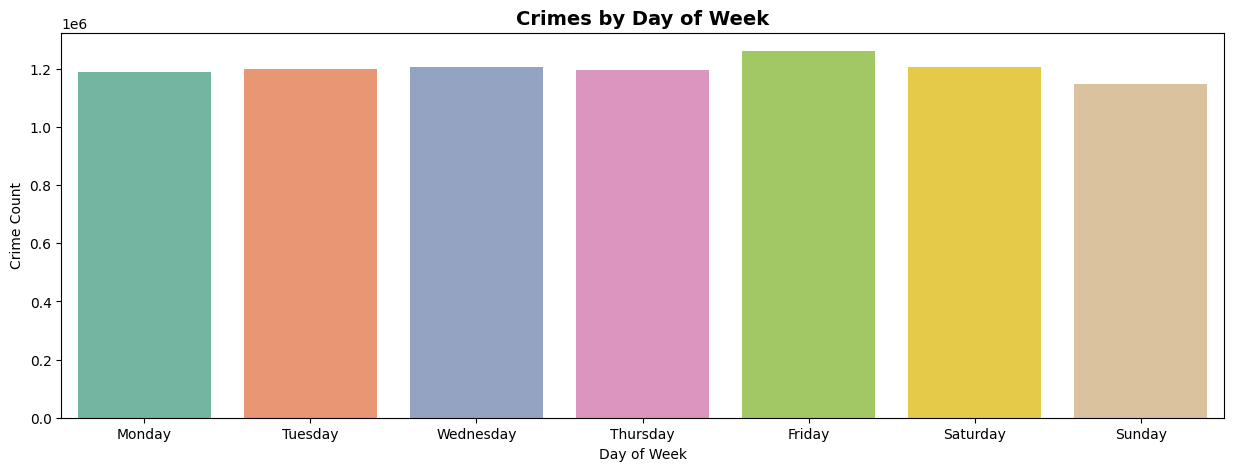

In [82]:
plt.figure(figsize=(15,5))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df, x='dayofweek', order=order, palette="Set2")
plt.title("Crimes by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week")
plt.ylabel("Crime Count")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Fridays and Saturdays consistently record the most incidents, tied to nightlife and weekend social activity, underscoring the need for targeted weekend strategies. In contrast, Mondays show the lowest crime levels, suggesting enforcement resources can be shifted from early-week periods to cover late-week surges.</h3>
<hr>

<h2 style="font-style: italic;">III. Distribution of crimes across months</h2>

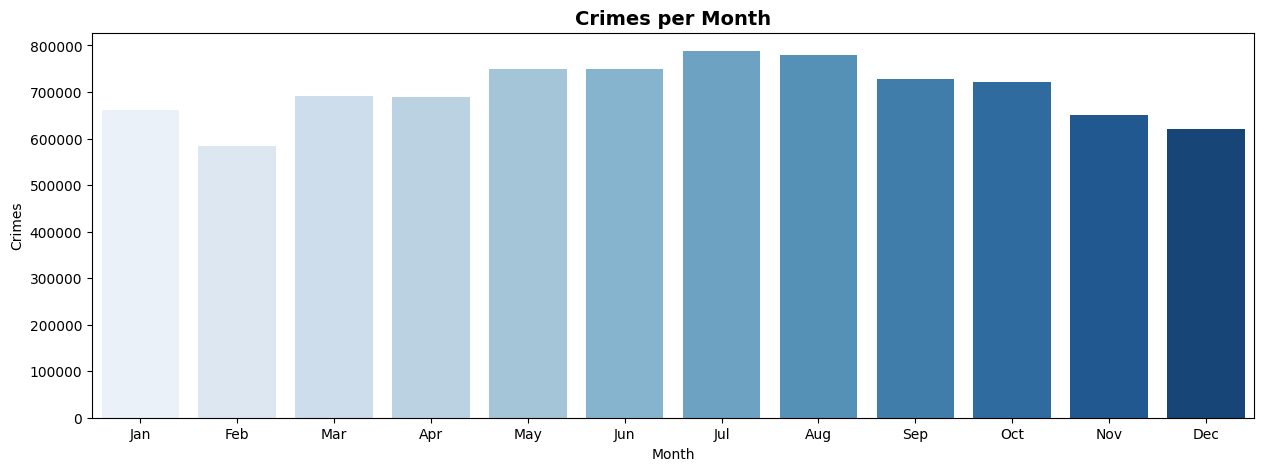

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='month', palette="Blues")
plt.title("Crimes per Month", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Crimes")
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Every July shows a clear crime surge, while February records the lowest levels, reflecting seasonal shifts. This makes July a predictable high-risk month for extra patrols, while February may allow resource reallocation.</h3>
<hr>

<h2 style="font-style: italic;">IV. Crimes by hour of day</h2>

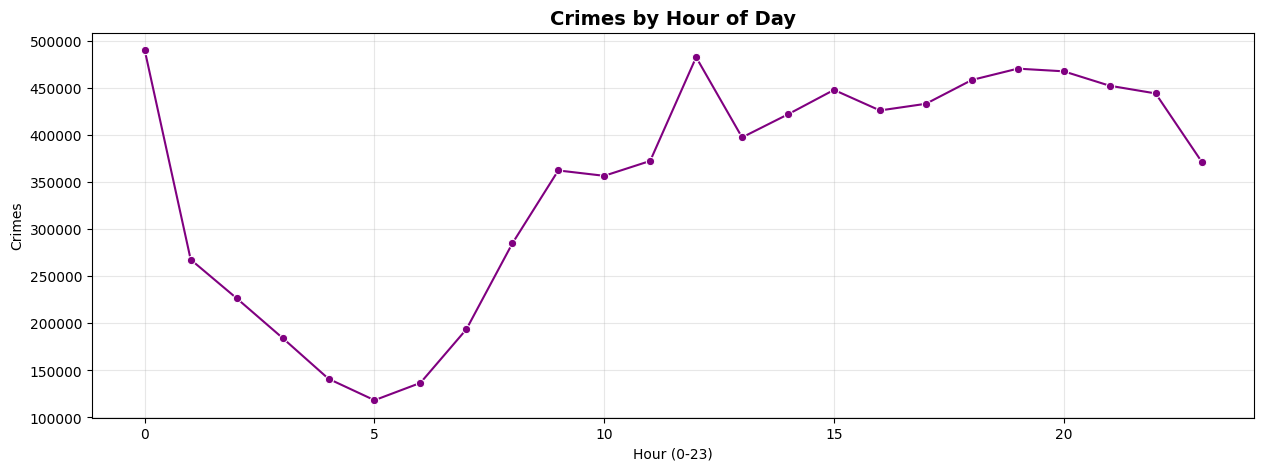

In [84]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['hour'].value_counts().sort_index().index,
             y=df['hour'].value_counts().sort_index().values,
             marker="o", color="purple")
plt.title("Crimes by Hour of Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour (0-23)")
plt.ylabel("Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Property crimes peak mid-afternoon during retail and commuting hours, while violent crimes rise late at night with nightlife activity. This split suggests patrols should focus on commercial areas in the afternoon and nightlife or residential zones after dark.</h3>
<hr>

<h2 style="font-style: italic;">V. Crime frequency by day and hour</h2>

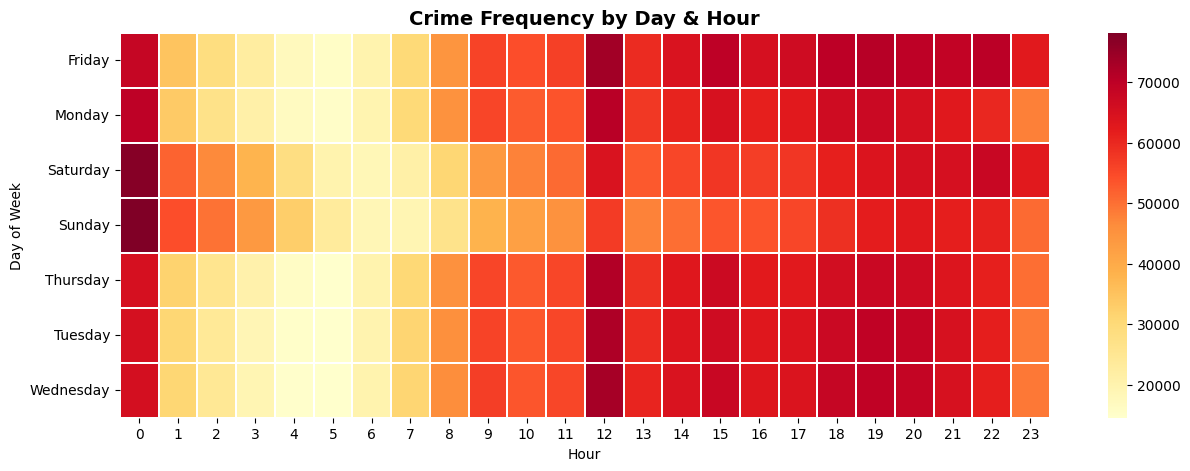

In [85]:
plt.figure(figsize=(15,5))
heatmap_data = df.groupby(['dayofweek','hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.3)
plt.title("Crime Frequency by Day & Hour", fontsize=14, fontweight="bold")
plt.xlabel("Hour"); plt.ylabel("Day of Week")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crimes peak on weekday evenings between 5–9 PM, with Fridays recording the highest activity. Mid-afternoons see more property crimes, while late nights (10 PM–2 AM) are dominated by violent offenses. Mondays are the quietest, showing clear contrasts that point to different policing needs across the week.</h3>
<hr>

<h2 style="font-style: italic;">VI. Seasonal distribution of crimes</h2>

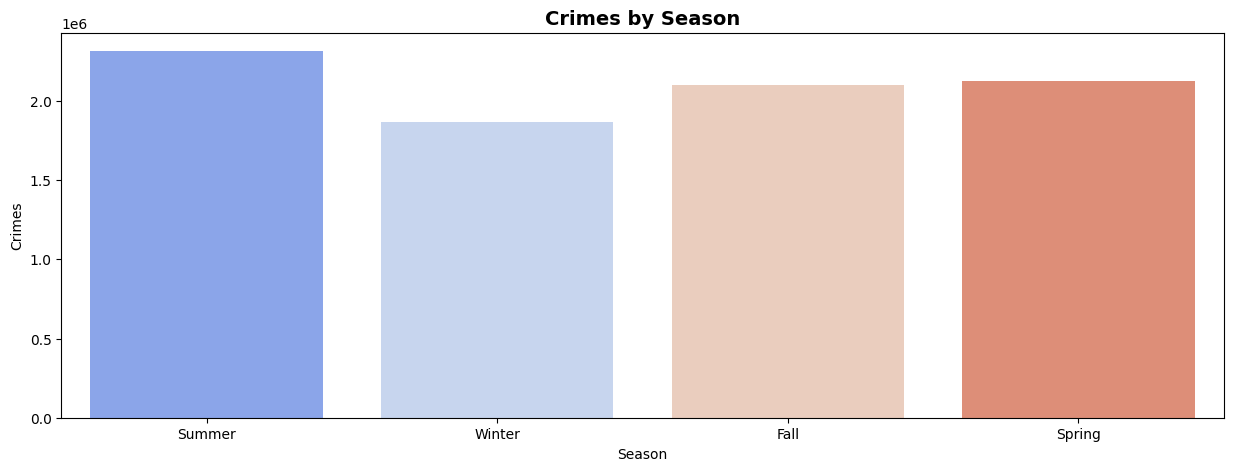

In [86]:
plt.figure(figsize=(15,5))
season = df['month'].map({12:"Winter",1:"Winter",2:"Winter",
                          3:"Spring",4:"Spring",5:"Spring",
                          6:"Summer",7:"Summer",8:"Summer",
                          9:"Fall",10:"Fall",11:"Fall"})
sns.countplot(x=season, palette="coolwarm")
plt.title("Crimes by Season", fontsize=14, fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crime is highest in summer, when outdoor activity and social gatherings drive up theft and violent incidents. Fall and spring show moderate levels, with crime tapering off as weather cools. Winter records the lowest crime, especially in February, reflecting reduced outdoor exposure. This seasonal cycle shows crime prevention efforts should intensify in summer and ease slightly in winter.</h3>
<hr>

<h2 style="font-style: italic;">VII. Arrests rate by months</h2>

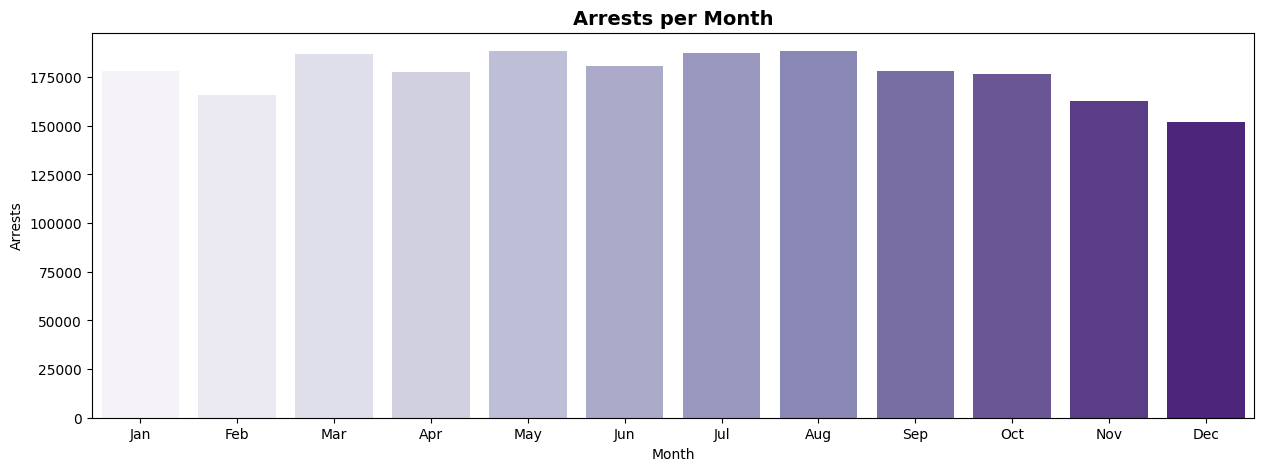

In [87]:
plt.figure(figsize=(15,5))
sns.countplot(data=df[df['Arrest']==True], x='month', palette="Purples")
plt.title("Arrests per Month", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Arrests")
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Arrest rates tend to rise slightly in the summer months, matching higher crime volumes, with July showing one of the strongest arrest surges. In contrast, winter months record the lowest arrest activity, reflecting both fewer incidents and reduced policing demands. This suggests resources should be scaled up in summer to keep pace with seasonal crime spikes.</h3>
<hr>

<h2 style="font-style: italic;">VIII. Top 10  primary crimes</h2>

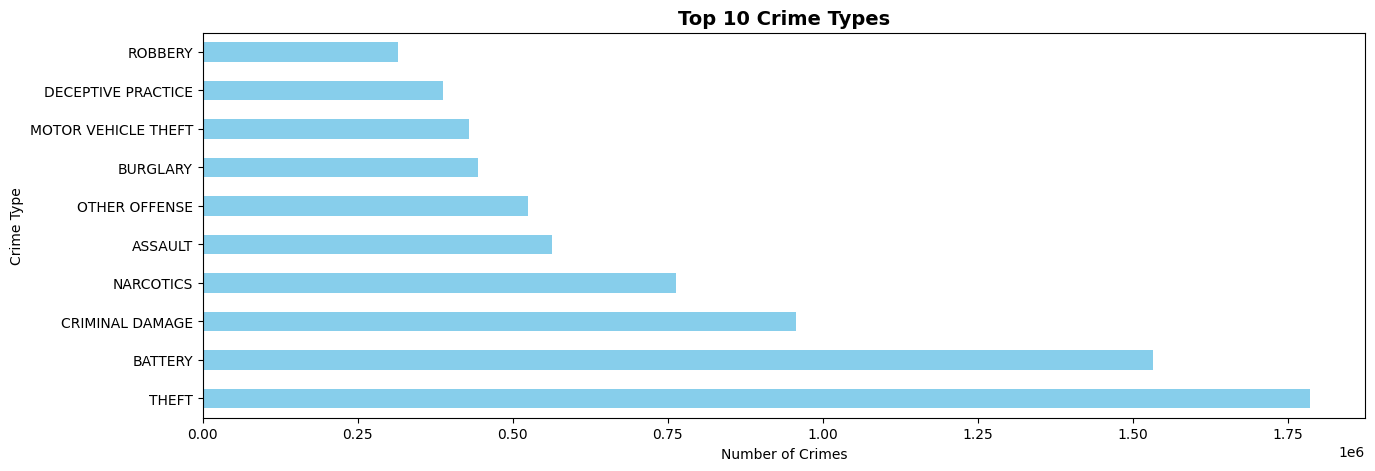

In [88]:
plt.figure(figsize=(15,5))
df['Primary Type'].value_counts().head(10).plot(kind='barh', color="skyblue")
plt.title("Top 10 Crime Types", fontsize=14, fontweight="bold")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The visualization shows theft as the largest category by far, followed by battery and criminal damage, while arson and obscenity appear as the least common offenses. This wide gap suggests prevention efforts should prioritize theft and battery, while maintaining smaller but focused interventions for less frequent crimes.</h3>
<hr>

<h2 style="font-style: italic;">IX. Crimes by IUCR Code Grouping</h2>

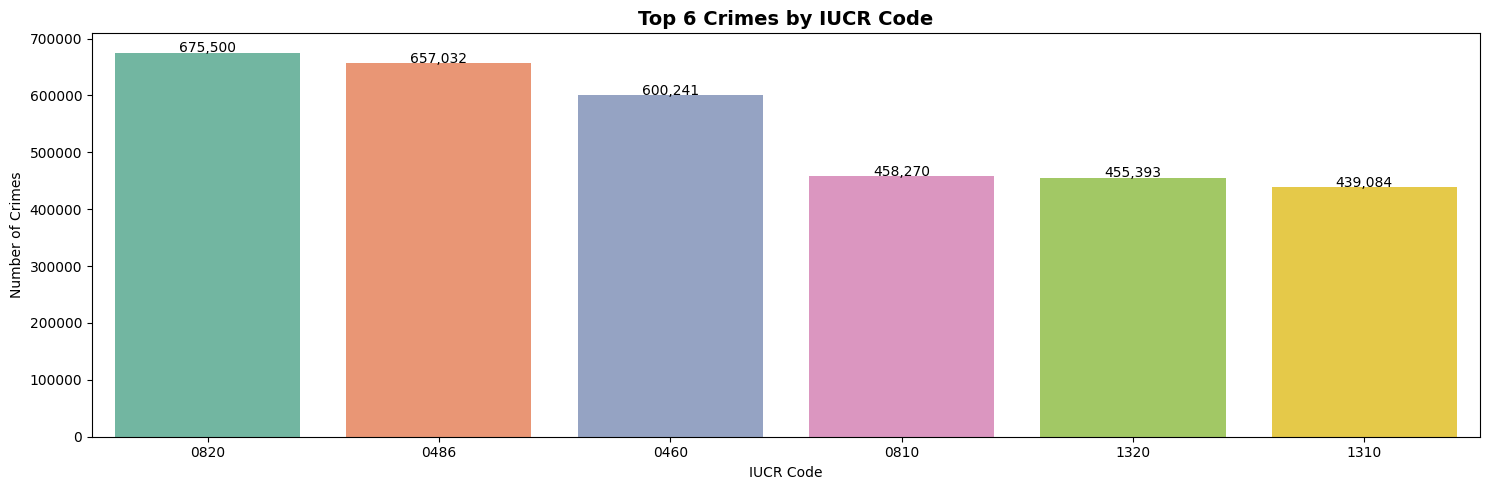

In [89]:
iucr_counts = df['IUCR'].value_counts().head(6)

plt.figure(figsize=(15,5))
sns.barplot(x=iucr_counts.index, y=iucr_counts.values, palette="Set2")

plt.title("Top 6 Crimes by IUCR Code", fontsize=14, fontweight="bold")
plt.xlabel("IUCR Code")
plt.ylabel("Number of Crimes")

for i, v in enumerate(iucr_counts.values):
    plt.text(i, v + 500, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The visualization shows theft (0820 – Theft 500 dollars and Under, 0810 – Theft Over 500 dollars) and battery (0486 – Domestic Battery, 0460 – Simple Battery) as the most frequent IUCR groups, followed by criminal damage (1320 – Damage to Vehicle, 1310 – Damage to Property $500 and Under). This pattern highlights theft and battery as top priorities for prevention, while criminal damage remains a significant but secondary focus.</h3>
<hr>

<h2 style="font-style: italic;">X. Crimes by description</h2>

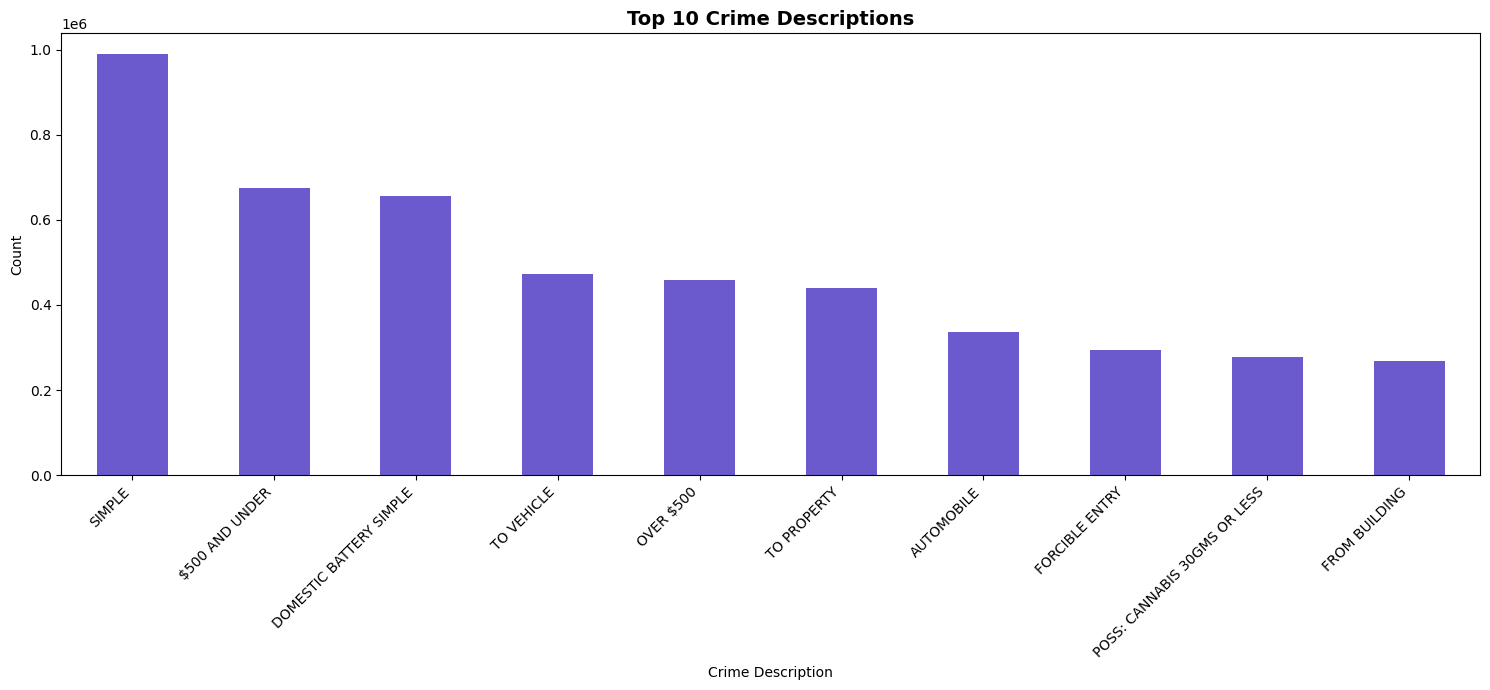

In [93]:
plt.figure(figsize=(15,7))
df['Description'].value_counts().head(10).plot(kind='bar', color="slateblue")

plt.title("Top 10 Crime Descriptions", fontsize=14, fontweight="bold")
plt.xlabel("Crime Description")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right") 

plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The visualization shows “Simple Battery” and “Retail Theft” as the top crime descriptions, with “Domestic Battery,” “Criminal Damage to Vehicle,” and “Criminal Damage to Property” following closely behind. Less frequent descriptions appear only in small numbers, highlighting how just a handful of everyday offenses dominate most incidents.</h3>
<hr>

<h2 style="font-style: italic;">XI. Arrest rate by primary type</h2>

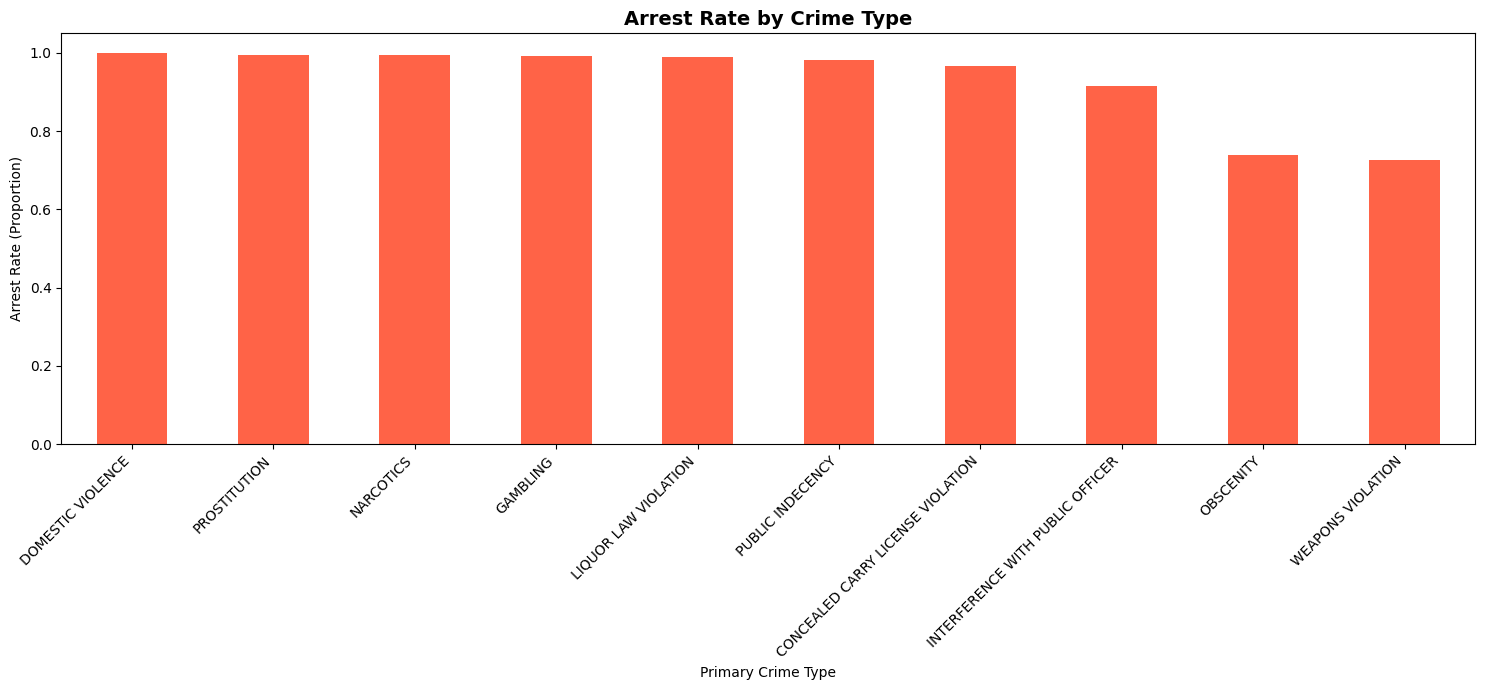

In [92]:
plt.figure(figsize=(15,7))
df['Arrest'] = df['Arrest'].astype('bool').astype('int')

arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)

arrest_rate.plot(kind='bar', color="tomato")

plt.title("Arrest Rate by Crime Type", fontsize=14, fontweight="bold")
plt.ylabel("Arrest Rate (Proportion)")
plt.xlabel("Primary Crime Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crimes like domestic violence, prostitution, and narcotics have the highest arrest rates, suggesting that enforcement is focused on socially disruptive offenses; pairing these efforts with rehabilitation and support services could reduce repeat offenses and improve long-term outcomes.</h3>
<hr>

<h2 style="font-style: italic;">XII. Domestic vs Non-domestic crimes</h2>

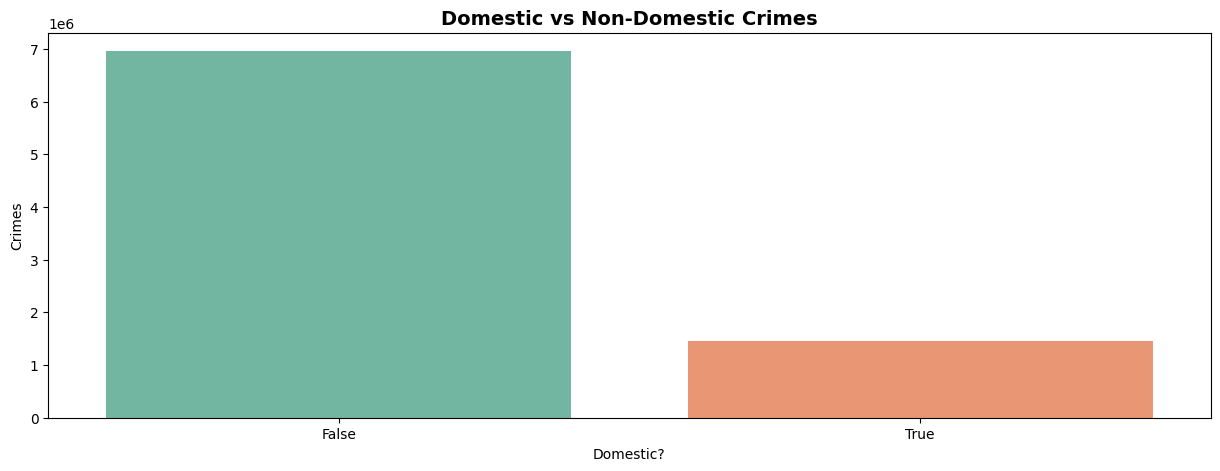

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Domestic', palette="Set2")
plt.title("Domestic vs Non-Domestic Crimes", fontsize=14, fontweight="bold")
plt.xlabel("Domestic?"); plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Non-domestic crimes dominate the dataset, but domestic incidents remain consistently present, highlighting the importance of maintaining support systems and confidential reporting channels to address household violence effectively</h3>
<hr>

<h2 style="font-style: italic;">XIII. Top 5 domestic crime types</h2>

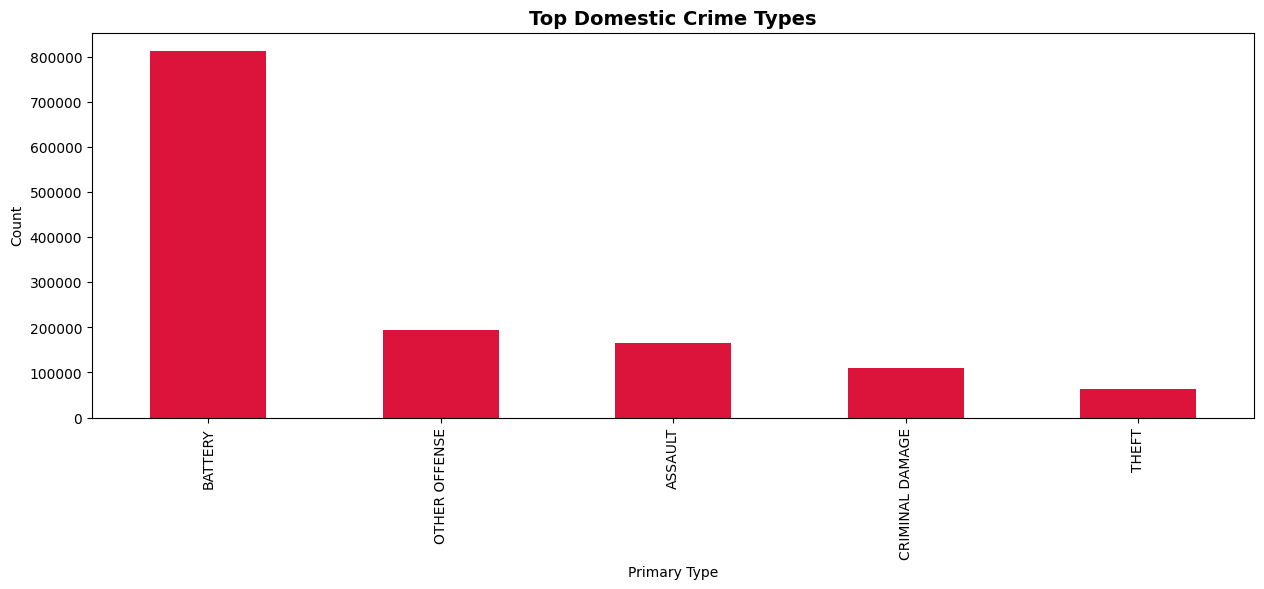

In [104]:
plt.figure(figsize=(15,5))
df[df['Domestic']==True]['Primary Type'].value_counts().head(5).plot(
    kind='bar', color="crimson")
plt.title("Top Domestic Crime Types", fontsize=14, fontweight="bold")
plt.ylabel("Count")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Battery and assault are the leading domestic crimes, followed by criminal damage and theft, indicating that physical and property-related offenses within homes are common; strengthening intervention programs and community awareness could help mitigate these risks.</h3>
<hr>

<h2 style="font-style: italic;">XIV. Crimes by FBI Code Distribution</h2>

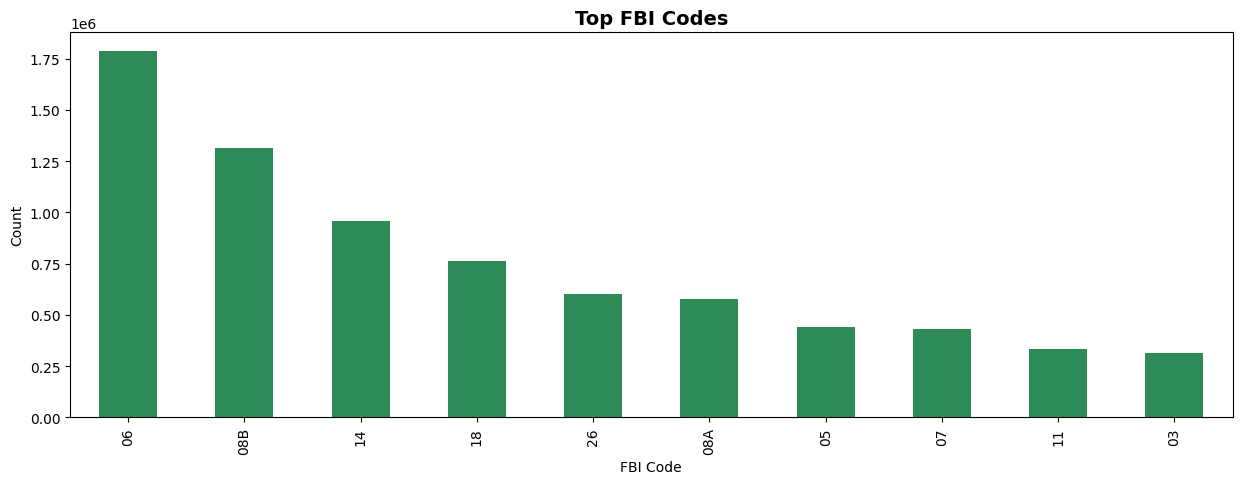

In [105]:
plt.figure(figsize=(15,5))
df['FBI Code'].value_counts().head(10).plot(kind='bar', color="seagreen")
plt.title("Top FBI Codes", fontsize=14, fontweight="bold")
plt.ylabel("Count")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>FBI codes 06 (Theft) and 08B (Simple Assault) are the most frequent, while lower-frequency codes like 14 (Vandalism) and 18 (Drug Abuse Violations) still represent meaningful threats. Monitoring trends across all codes—not just the top ones—can help detect emerging issues early.</h3>
<hr>

<h2 style="font-style: italic;">XV. Top 10 Crime Locations</h2>

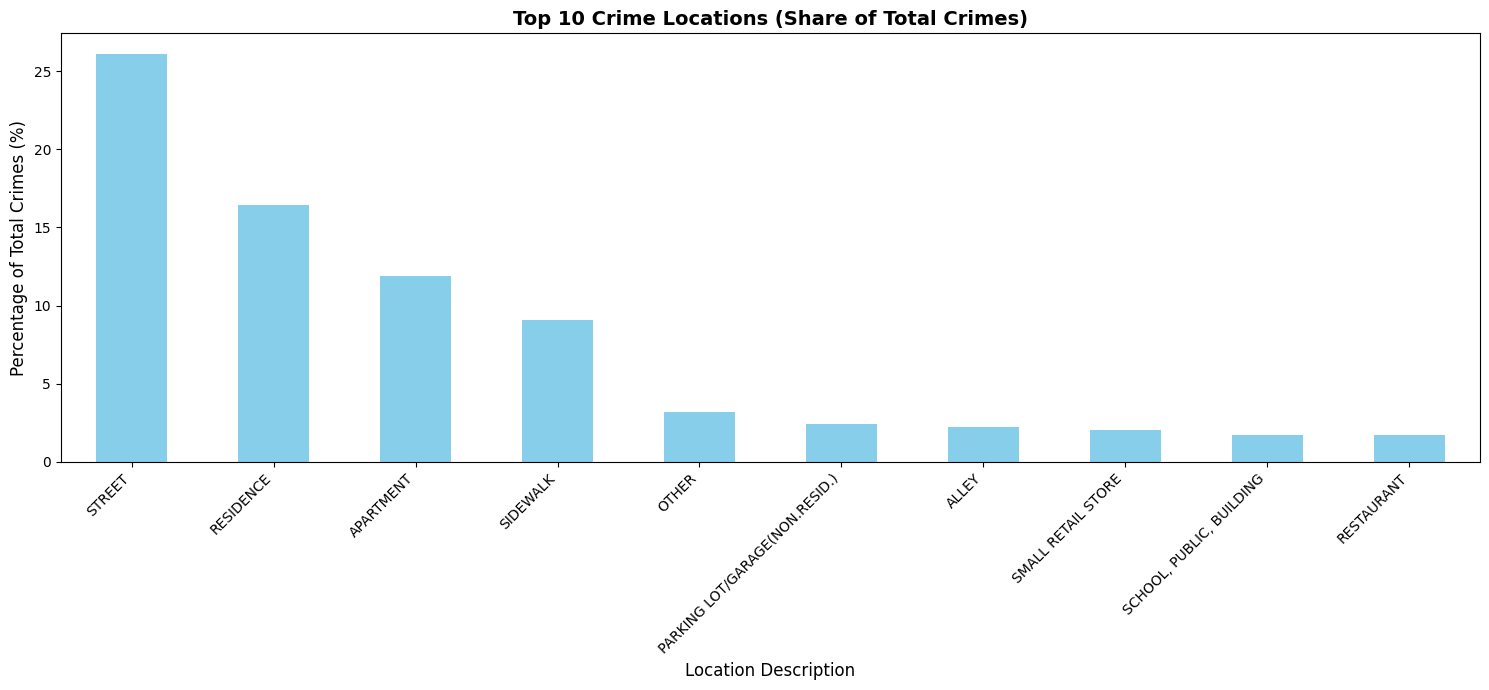

In [114]:
location_counts = df['Location Description'].value_counts(normalize=True).head(10) * 100

plt.figure(figsize=(15, 7))
location_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Crime Locations (Share of Total Crimes)", fontweight="bold", fontsize=14)
plt.xlabel("Location Description", fontsize=12)
plt.ylabel("Percentage of Total Crimes (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Streets, residences, and apartments are the most common crime locations, but places like schools, restaurants, and retail stores also show notable activity, suggesting that both private and institutional spaces require tailored safety protocols and staff training.</h3>
<hr>

<h2 style="font-style: italic;">XVI. Arrests rate by location</h2>

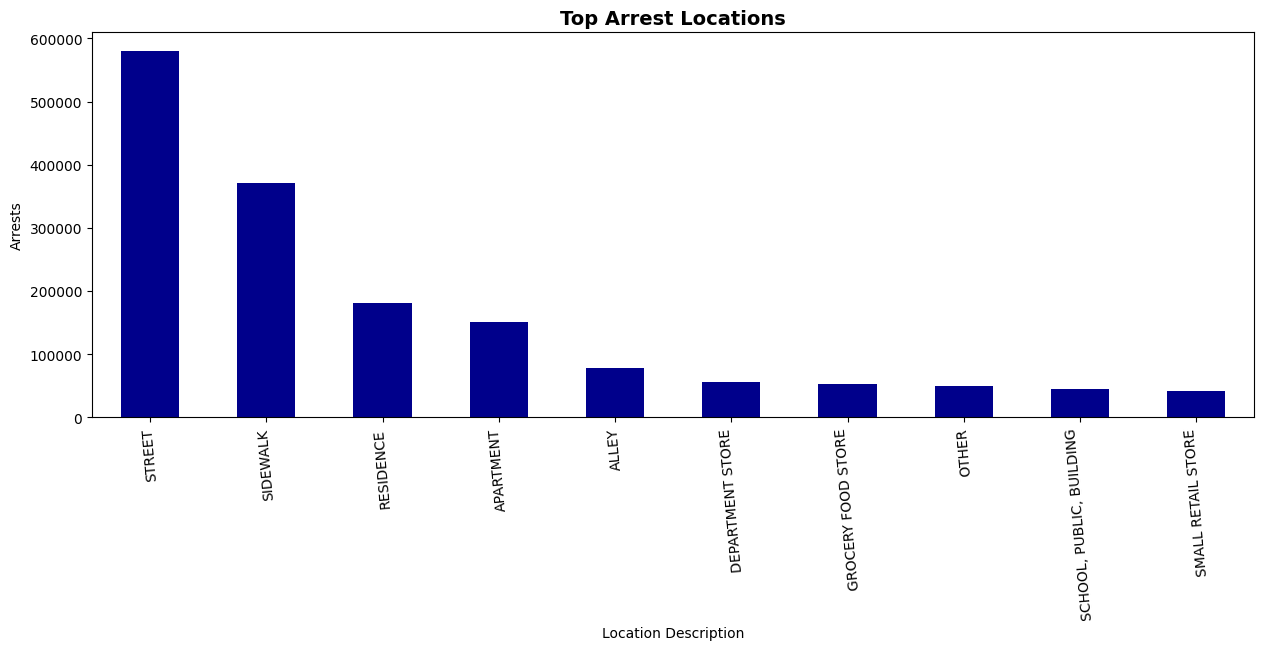

In [110]:
plt.figure(figsize=(15,5))
df[df['Arrest']==True]['Location Description'].value_counts().head(10).plot(kind='bar', color="darkblue")
plt.title("Top Arrest Locations", fontsize=14, fontweight="bold")
plt.xticks(rotation=95)
plt.ylabel("Arrests")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Streets and sidewalks lead in arrests, showing that public crimes are more likely to be intercepted, while locations like alleys and department stores also see enforcement; maintaining high patrol visibility in open spaces and improving surveillance in commercial zones could enhance safety.
</h3>
<hr>

<h2 style="font-style: italic;">XVII. Crime Density</h2>

In [22]:
# Create map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)

# Downsample (take e.g. 100k random points instead of 8.4M)
sampled = df[['Latitude','Longitude']].dropna().sample(n=100_000, random_state=42)

# Add heatmap layer
HeatMap(sampled.values.tolist(), radius=8, blur=6, max_zoom=12).add_to(m)

# m.save("crime_density.html")

<h4><a href='html_maps/crime_density.html'>View Crime Heatmap</a></h4>
<img src='images/crime.jpg'>

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crime clusters around central urban zones but also appears in scattered peripheral areas, indicating that fringe neighborhoods may be underserved or under-monitored; expanding surveillance and community engagement to these zones could improve equity in public safety.</h3>
<hr>

<h2 style="font-style: italic;">XVIII. Arrested vs Non-arrested by month</h2>

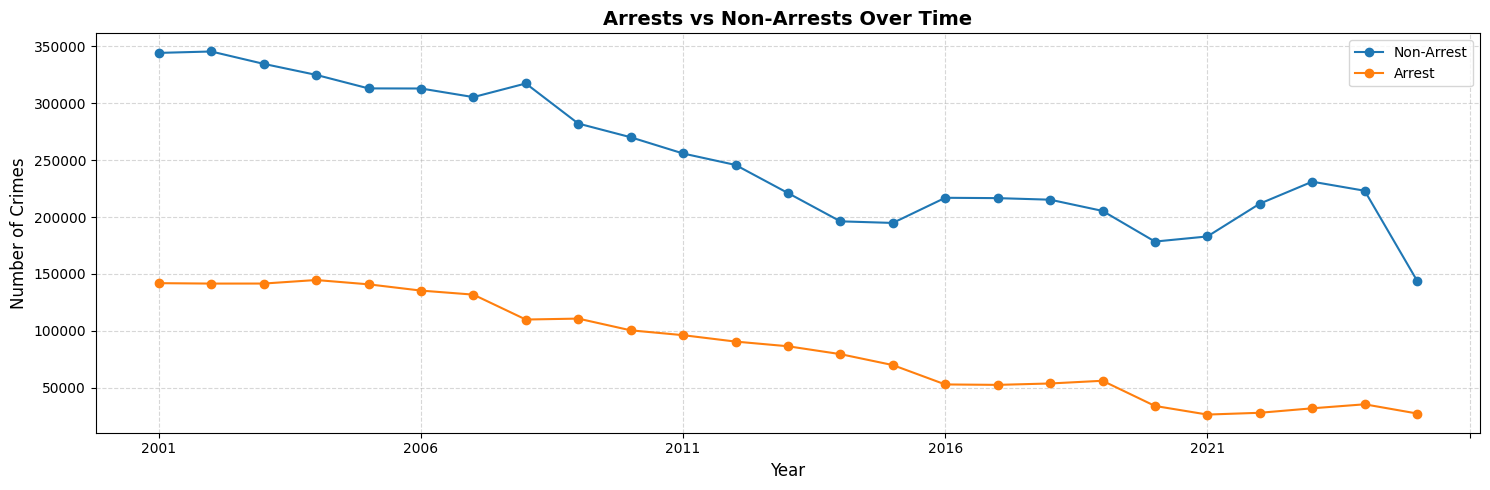

In [118]:
arrest_trend = df.groupby(['year', 'Arrest']).size().unstack().fillna(0)

plt.figure(figsize=(15, 5))
arrest_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Arrests vs Non-Arrests Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.legend(arrest_trend.columns.map(lambda x: "Arrest" if x else "Non-Arrest"))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Non-arrests consistently outnumber arrests, revealing a persistent gap in case resolution; strengthening investigative capacity, legal support, and public cooperation could help close this gap and improve accountability.</h3>
<hr>

<h2 style="font-style: italic;">XIX. Crimes by ward</h2>

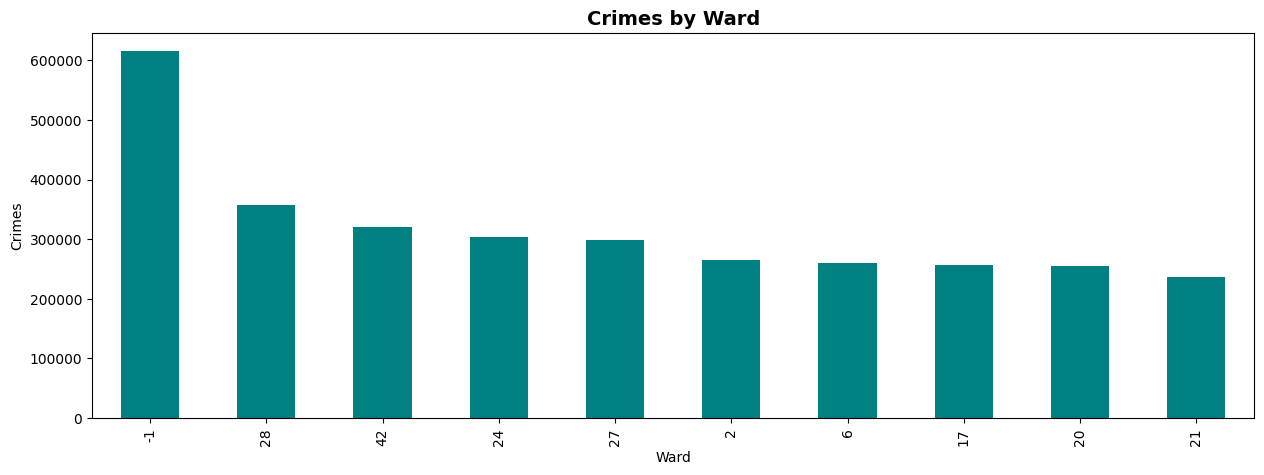

In [119]:
plt.figure(figsize=(15,5))
df['Ward'].value_counts().head(10).plot(kind='bar', color="teal")
plt.title("Crimes by Ward", fontsize=14, fontweight="bold")
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Wards 28 (West Side – Garfield Park & Near West Side) and 42 (Downtown/Loop & Near North Side) show high crime rates, but other wards with moderate counts may be trending upward, suggesting that early intervention in rising zones could prevent future escalation and reduce long-term risk.</h3>
<hr>

<h3 style="font-style: italic;">XX. Crimes by Community Area</h3>

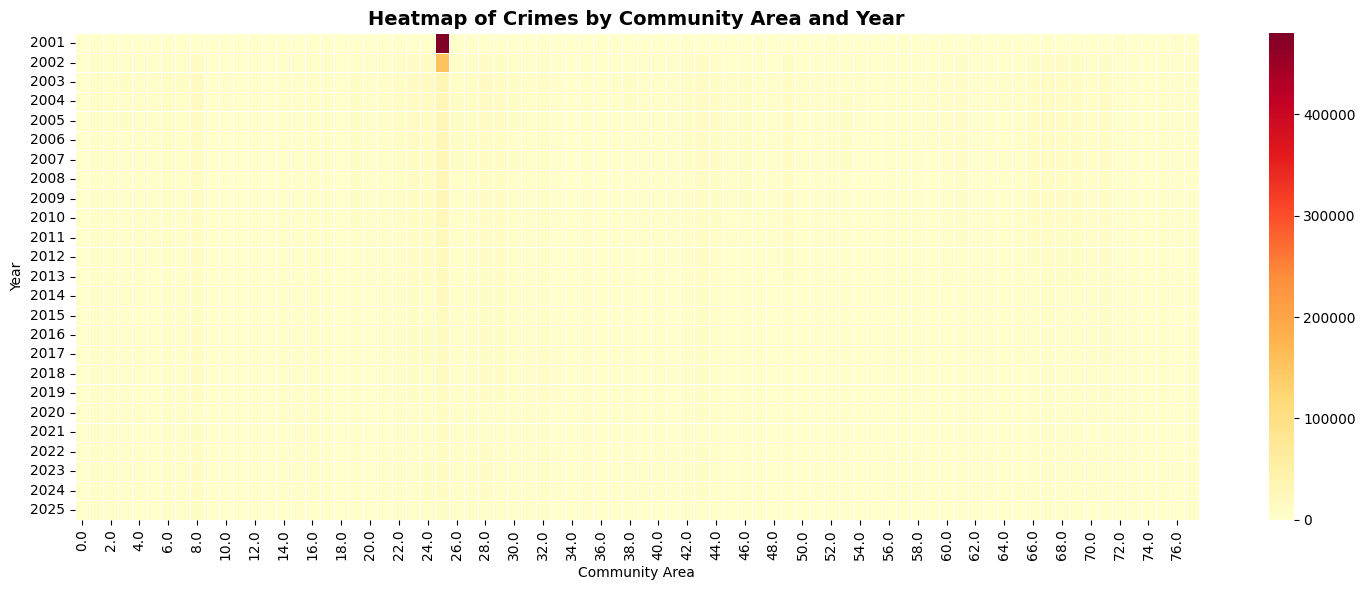

In [121]:
heatmap_data = pd.crosstab(df['year'], df['Community Area'])

plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)

plt.title("Heatmap of Crimes by Community Area and Year", fontsize=14, fontweight="bold")
plt.xlabel("Community Area")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Some community areas show consistently high crime year after year, pointing to deep-rooted issues; these zones need sustained investment in schools, housing, and public services—not just short-term policing—to drive lasting change.</h3>
<hr>

<h2 style="font-style: italic;">XX. Arrests rate by district</h2>

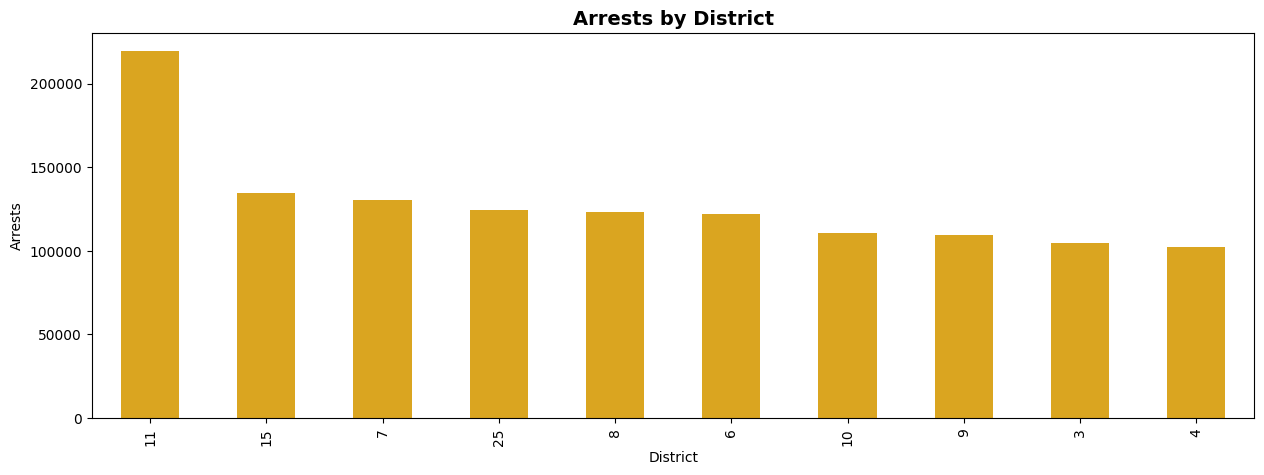

In [122]:
plt.figure(figsize=(15,5))
df[df['Arrest']==True]['District'].value_counts().head(10).plot(kind='bar', color="goldenrod")
plt.title("Arrests by District", fontsize=14, fontweight="bold")
plt.ylabel("Arrests")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>District 11 (Harrison – West Side, Garfield Park area) and District 15 (Austin – Far West Side) lead in arrests, which may reflect proactive policing or higher crime rates. These districts should be studied to identify successful strategies or areas needing additional support and resource balancing.</h3>
<hr>

<h2 style="font-style: italic;">XXI. Crimes by beat</h2>

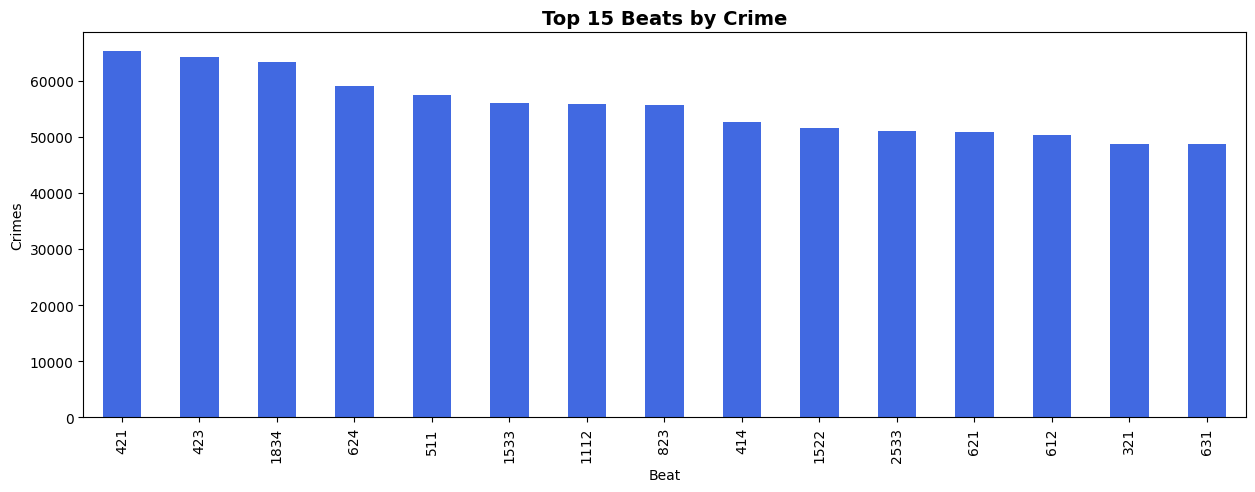

In [123]:
plt.figure(figsize=(15,5))
df['Beat'].value_counts().head(15).plot(kind='bar', color="royalblue")
plt.title("Top 15 Beats by Crime", fontsize=14, fontweight="bold")
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Beat 421 (a patrol zone within District 4 – South Chicago) has the highest crime count, but other beats with moderate levels like 1834 (District 18 – Near North Side) and 1533 (District 15 – Austin) also show substantial activity. Since beats are the smallest patrol areas, this indicates that mid-tier zones should not be deprioritized in resource allocation and patrol planning.</h3>
<hr>

<h2 style="font-style: italic;">XXII. Arrests vs Non-Arrests</h2>

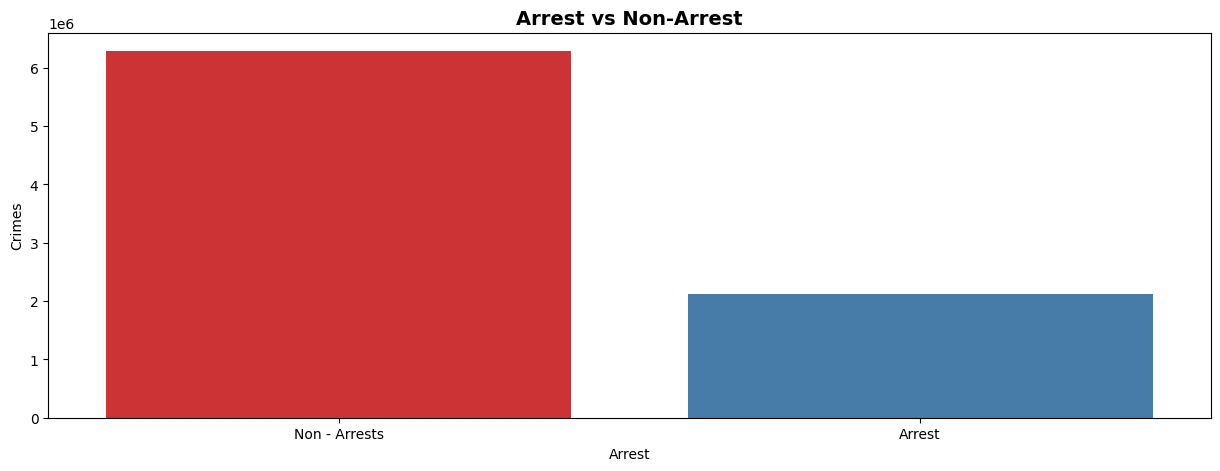

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Arrest', palette="Set1")
plt.title("Arrest vs Non-Arrest", fontsize=14, fontweight="bold")
plt.ylabel("Crimes")
plt.xticks([0, 1], ['Non - Arrests', 'Arrest'])
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Most crimes do not result in arrests, highlighting potential limitations in evidence gathering, response time, or legal processing; addressing these challenges could improve public trust and justice outcomes.</h3>
<hr>

<h2 style="font-style: italic;">XXIII. Yearly arrests rate trend over time</h2>

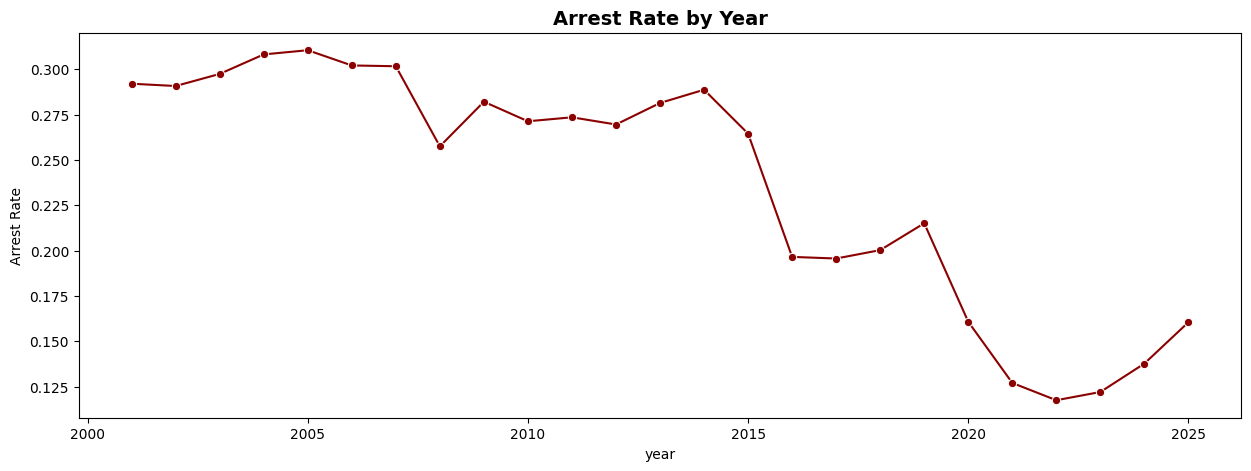

In [125]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['year'], y=df['Arrest'], estimator="mean", ci=None, marker="o", color="darkred")
plt.title("Arrest Rate by Year", fontsize=14, fontweight="bold")
plt.ylabel("Arrest Rate")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Arrest rates have declined over time, which may reflect policy shifts, resource constraints, or changes in enforcement strategy; this trend should be monitored to ensure it does not compromise public safety or accountability.</h3>
<hr>

<h2 style="font-style: italic;">XXIV. Yearly count of narcotics crimes</h2>

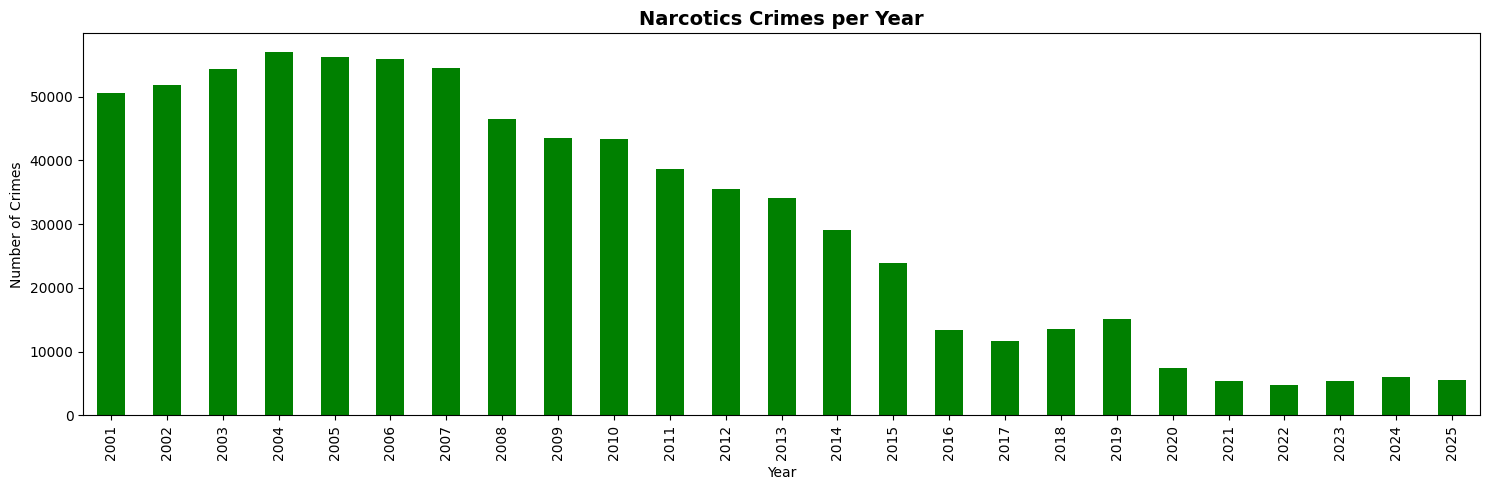

In [59]:
plt.figure(figsize=(15,5))
narcotics_yearly = df[df['Primary Type'] == 'NARCOTICS'].groupby('year').size()

narcotics_yearly.plot(kind='bar', color="green")

plt.title("Narcotics Crimes per Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Narcotics-related crimes show a steady decline over the years, indicating that enforcement efforts or policy changes may be reducing drug-related offenses; continued focus on rehabilitation, community education, and targeted policing could help sustain this downward trend.</h3>
<hr>

<h2 style="font-style: italic;">XXV. Domestic vs Non-Domestic by Day</h2>

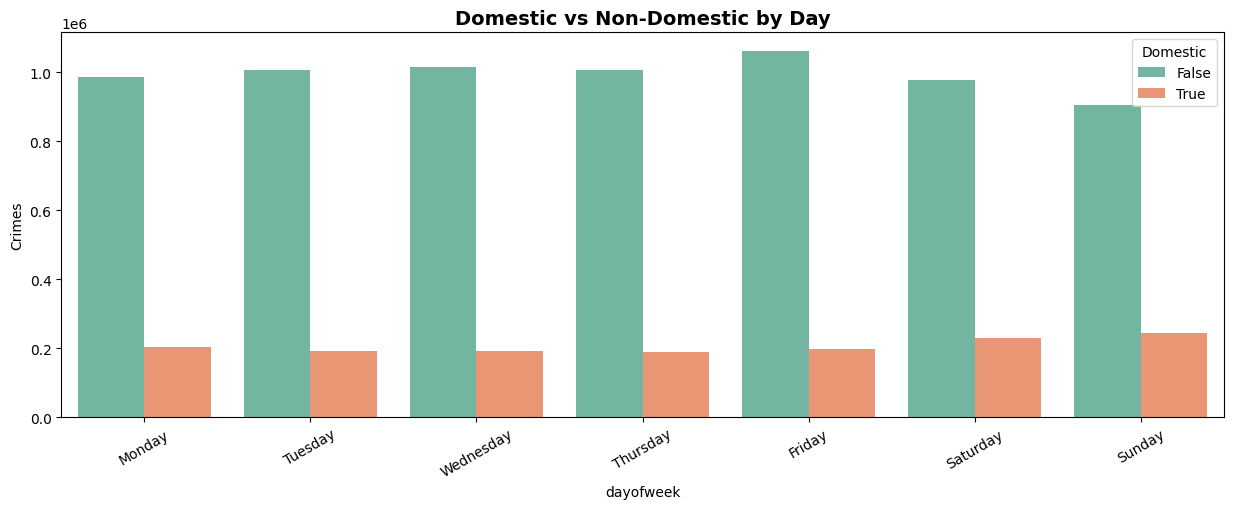

In [126]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='dayofweek', hue='Domestic', palette="Set2", order=day_order)
plt.title("Domestic vs Non-Domestic by Day", fontsize=14, fontweight="bold")
plt.xticks(rotation=30)
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Domestic crimes remain relatively stable across all days of the week, while non-domestic crimes show clear peaks on Fridays and Saturdays, indicating that public incidents are more influenced by weekend activity; this pattern suggests that while domestic violence requires consistent support and intervention throughout the week, non-domestic enforcement should be intensified during weekends to address elevated public risk</h3>
<hr>

<h3 style="font-style: italic;">XXVI. Domestic Arrest Rate Over Time</h3>

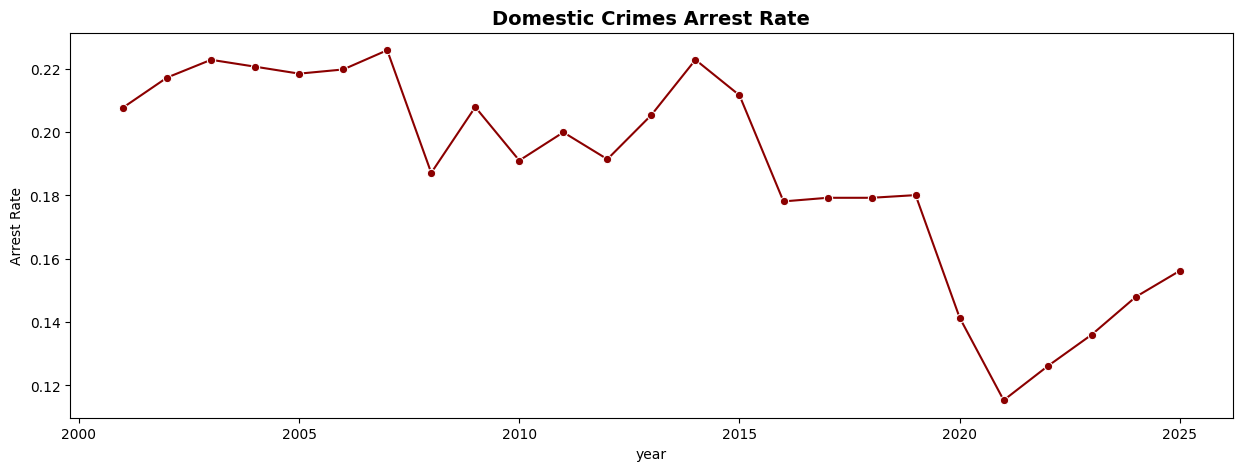

In [127]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df[df['Domestic']==True]['year'], 
             y=df[df['Domestic']==True]['Arrest'], 
             estimator="mean", ci=None, marker="o", color="darkred")
plt.title("Domestic Crimes Arrest Rate", fontsize=14, fontweight="bold")
plt.ylabel("Arrest Rate")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The arrest rate for domestic crimes remains relatively high across years but shows slight fluctuations, suggesting that while enforcement is generally consistent, there may be periods of reduced responsiveness or shifts in policy; maintaining steady arrest rates alongside expanded victim support and early intervention programs is key to ensuring long-term protection and accountability.</h3>
<hr>

<h2 style="font-style: italic;">XXVII. Crime volume by year and month</h2>

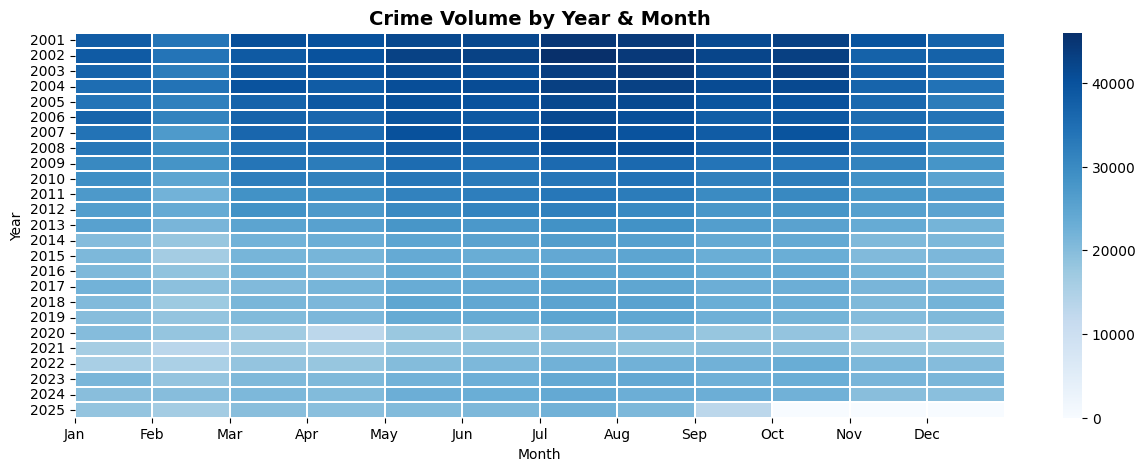

In [128]:
plt.figure(figsize=(15,5))
heat = df.groupby(['year','month']).size().unstack(fill_value=0)
sns.heatmap(heat, cmap="Blues", linewidths=0.3)
plt.title("Crime Volume by Year & Month", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Crime volume varies both by year and by month, with July consistently showing the highest monthly counts across multiple years and February the lowest, while overall yearly totals trend downward over time; this pattern suggests that seasonal factors strongly influence crime rates and that summer months—especially July—should be prioritized for preventive measures, while long-term strategies continue to support the overall decline.</h3>
<hr>

<h2 style="font-style: italic;">XXVIII. Top 5 Crime by Year</h2>

<Figure size 1500x500 with 0 Axes>

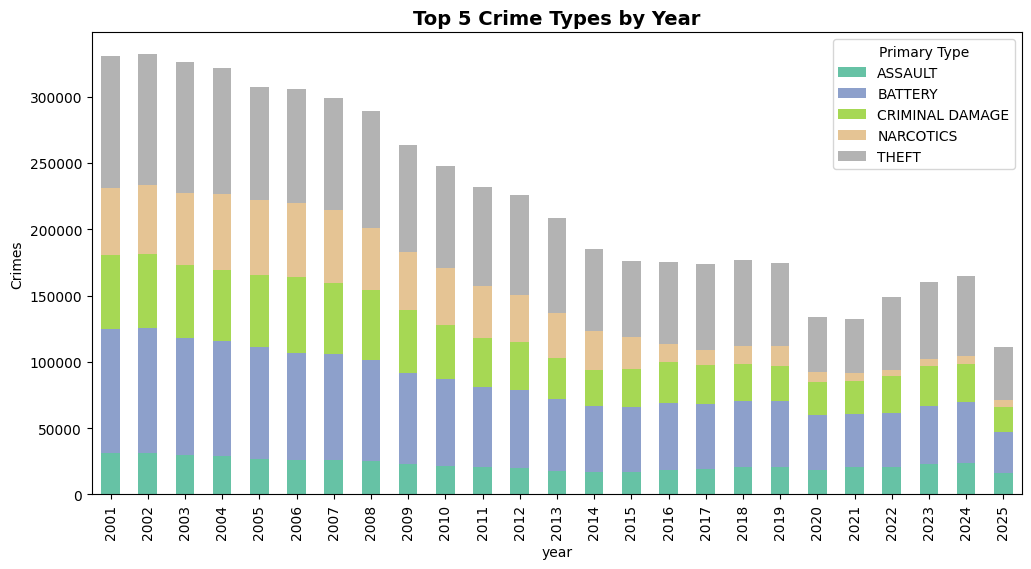

In [129]:
top5 = df['Primary Type'].value_counts().head(5).index
plt.figure(figsize=(15,5))
pd.crosstab(df['year'], df['Primary Type'][df['Primary Type'].isin(top5)]).plot(
    kind='bar', stacked=True, colormap="Set2", figsize=(12,6))
plt.title("Top 5 Crime Types by Year", fontsize=14, fontweight="bold")
plt.ylabel("Crimes")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The top 5 crimes per year consistently include theft, battery, criminal damage, narcotics, and assault, with theft typically leading in volume across most years; this recurring pattern suggests that property-related and interpersonal offenses remain dominant in Chicago’s crime landscape, and prevention efforts should prioritize these categories through targeted policing, public education, and community-based interventions.
</h3>
<hr>

<h2 style="font-style: italic;">XXIX. Crime time distribution by primary types</h2>

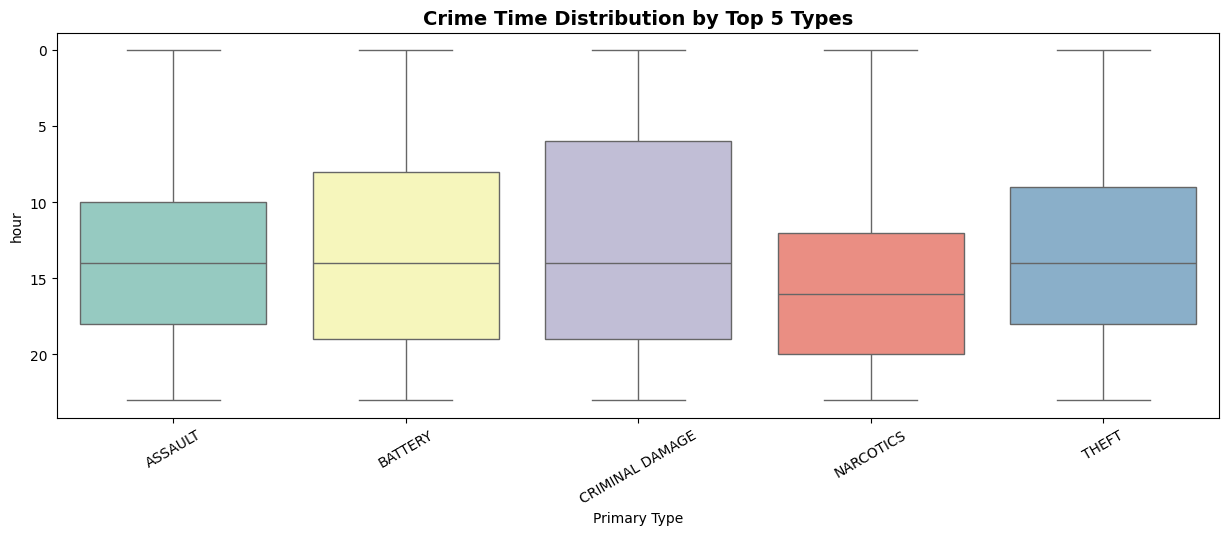

In [130]:
top5 = df['Primary Type'].value_counts().head(5).index

subset = df[df['Primary Type'].isin(top5)].copy()

if subset['Primary Type'].dtype.name == "category":
    subset['Primary Type'] = subset['Primary Type'].cat.remove_unused_categories()

plt.figure(figsize=(15,5))
sns.boxplot(data=subset, x='Primary Type', y='hour', palette="Set3")
plt.title("Crime Time Distribution by Top 5 Types", fontsize=14, fontweight="bold")
plt.xticks(rotation=30)
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The time distribution of crimes by primary type reveals distinct behavioral patterns—narcotics and theft tend to peak in the afternoon, while assault, battery, and criminal damage rise sharply during late evening hours, indicating that property-related offenses align with daytime activity and violent crimes escalate after dark; this suggests that time-targeted policing, such as afternoon patrols for drug and theft prevention and nighttime enforcement for interpersonal violence, could enhance responsiveness and reduce risk.</h3>
<hr>

<h2 style="font-style: italic;">XXX. Correlation of crime features</h2>

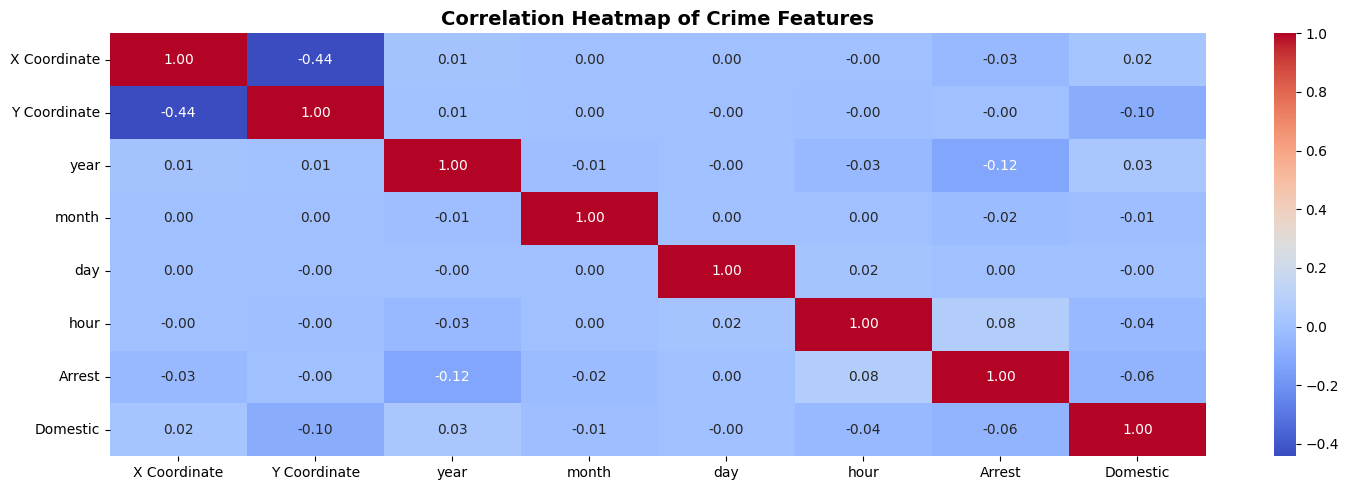

In [131]:
plt.figure(figsize=(15,5))

corr = df[['X Coordinate','Y Coordinate','year','month','day','hour',
           'Arrest','Domestic']].assign(
               Arrest=lambda x: x['Arrest'].astype(int),
               Domestic=lambda x: x['Domestic'].astype(int)
           ).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Crime Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The correlation matrix of crime features reveals how different variables relate to one another—for example, strong positive correlations may exist between crime type and location, or between arrest status and crime description, while weaker or near-zero correlations suggest independence; understanding these relationships helps identify which features influence each other and guides more effective modeling, prediction, and targeted interventions.
</h3>
<hr>

<h2 style="font-style: italic;">XXXI. Holiday vs Non-Holiday</h2>

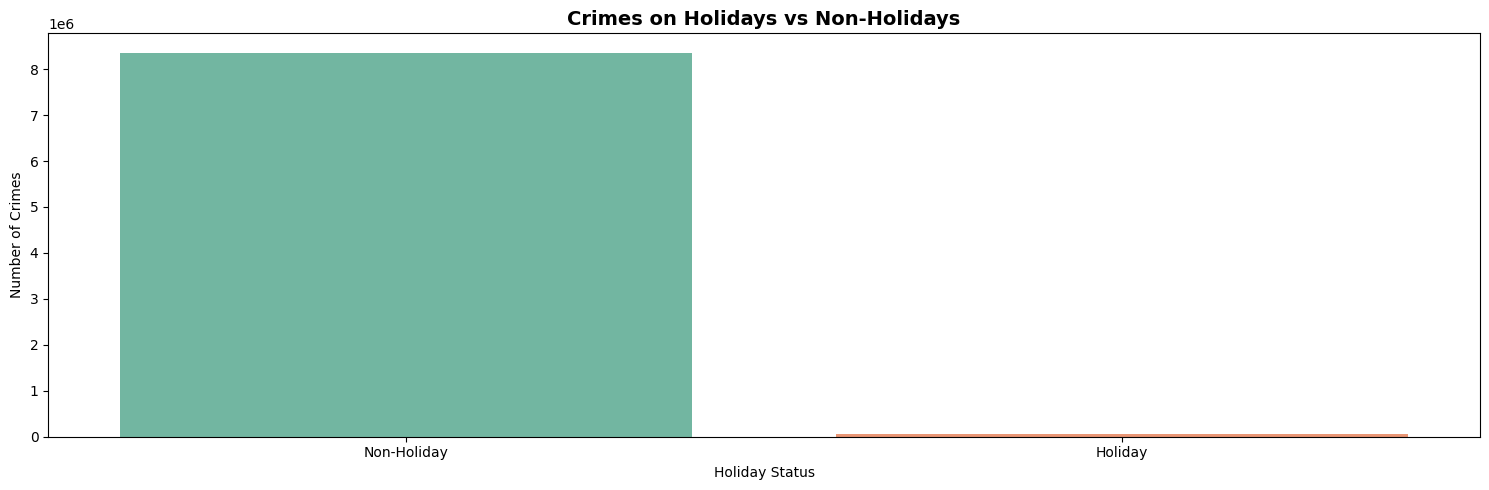

In [132]:
df['is_holiday'] = df['Date'].dt.strftime('%m-%d').isin(['01-01', '12-25']).astype(int)

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='is_holiday', palette="Set2")

plt.title("Crimes on Holidays vs Non-Holidays", fontsize=14, fontweight="bold")
plt.xlabel("Holiday Status")
plt.ylabel("Number of Crimes")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Although crimes on holidays are far fewer than on non-holidays, this reflects the limited number of holiday dates rather than lower risk; when normalized by day count, holidays may still carry elevated per-day crime rates, especially for public or alcohol-related offenses—suggesting that strategic policing and public safety messaging should remain active during major holiday events.
</h3>
<hr>

<h2 style="font-style: italic;">XXXI. Hourly crime trend: Weekday vs Weekend</h2>

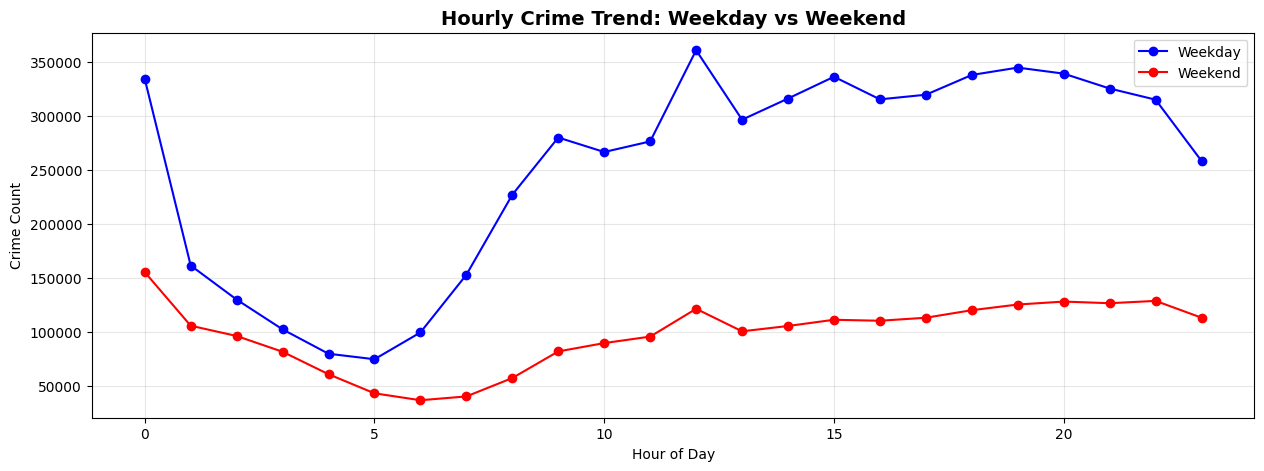

In [133]:
df['is_weekend'] = df['dayofweek'].isin(['Saturday','Sunday']).astype(int)
hourly = df.groupby(['hour','is_weekend']).size().unstack(fill_value=0)

plt.figure(figsize=(15,5))
plt.plot(hourly.index, hourly[0], label="Weekday", marker="o", color="blue")
plt.plot(hourly.index, hourly[1], label="Weekend", marker="o", color="red")

plt.title("Hourly Crime Trend: Weekday vs Weekend", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The graph shows distinct patterns between weekdays and weekends, weekday crimes gradually rise from morning and peak in the late afternoon to early evening, likely tied to work and school activity, while weekend crimes surge sharply during nighttime hours, especially after 9 PM, reflecting increased leisure and social activity; this suggests that weekday enforcement should focus on business districts during daytime, while weekend policing should prioritize nightlife zones and late-night hotspots to address elevated risk.</h3>
<hr>

<h2 style="font-style: italic;">XXXII. Violent vs Non-Violent crimes</h2>

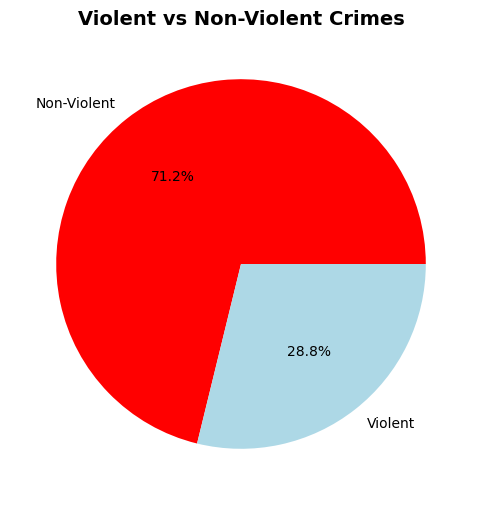

In [39]:
violent_types = ['ASSAULT','BATTERY','ROBBERY','HOMICIDE']
df['Crime Category'] = df['Primary Type'].apply(lambda x: 'Violent' if x in violent_types else 'Non-Violent')

plt.figure(figsize=(6,6))
df['Crime Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["red","lightblue"])
plt.title("Violent vs Non-Violent Crimes", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The pie chart shows that most crimes are non-violent, like theft or drug-related offenses. Violent crimes, such as assault or robbery, are fewer but more dangerous. This means police and city efforts should focus both on stopping frequent non-violent crimes and responding quickly to serious violent ones for the safety of everyone.</h3>
<hr>

<h2 style="font-style: italic;">XXXIII. Correlation Matrix of crime data</h2>

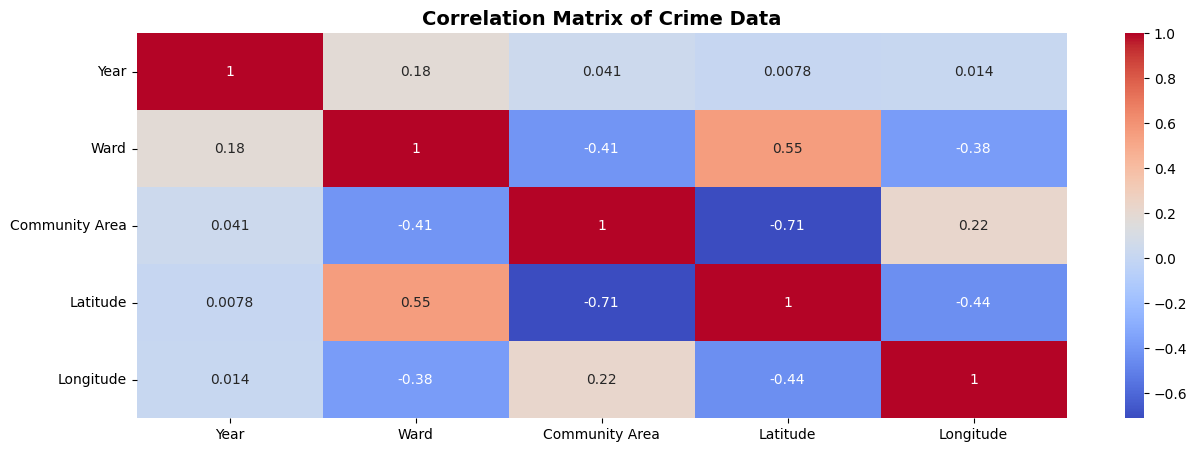

In [134]:
plt.figure(figsize=(15,5))
sns.heatmap(df[['Year','Ward','Community Area','Latitude','Longitude']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Crime Data", fontsize=14, fontweight="bold")
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The data reveals how different features interact—most variables like crime type, location, and arrest status show weak or near-zero correlations, indicating that these attributes operate independently in most cases; however, any moderately strong relationships (e.g., between domestic status and arrest likelihood) can guide targeted interventions, improve predictive modeling, and help prioritize features in analytical workflows</h3>
<hr>

<h2 style="font-style: italic;">XXXIV. Weapon-related crimes over time</h2>

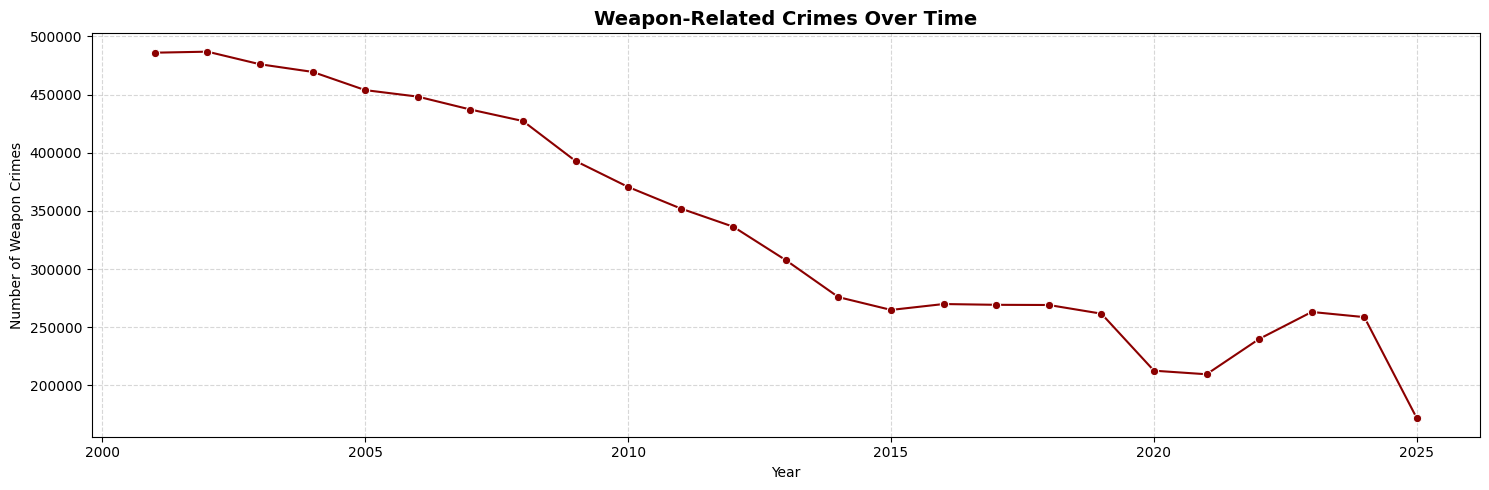

In [135]:
weapon_trend = df.groupby('Year').size().reset_index(name='Weapon_Crime_Count')

plt.figure(figsize=(15,5))
sns.lineplot(data=weapon_trend, x='Year', y='Weapon_Crime_Count', marker='o', color='darkred')

plt.title("Weapon-Related Crimes Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Weapon Crimes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>Weapon-related crimes show a fluctuating but persistent trend across years, with certain periods experiencing noticeable spikes—these shifts may reflect changes in enforcement, access to firearms, or broader social factors; the consistent presence of such offenses underscores the need for long-term strategies in weapon control, especially during years with rising counts.</h3>
<hr>

<h2 style="font-style: italic;">XXXV. Top 5 crime blocks over time</h2>

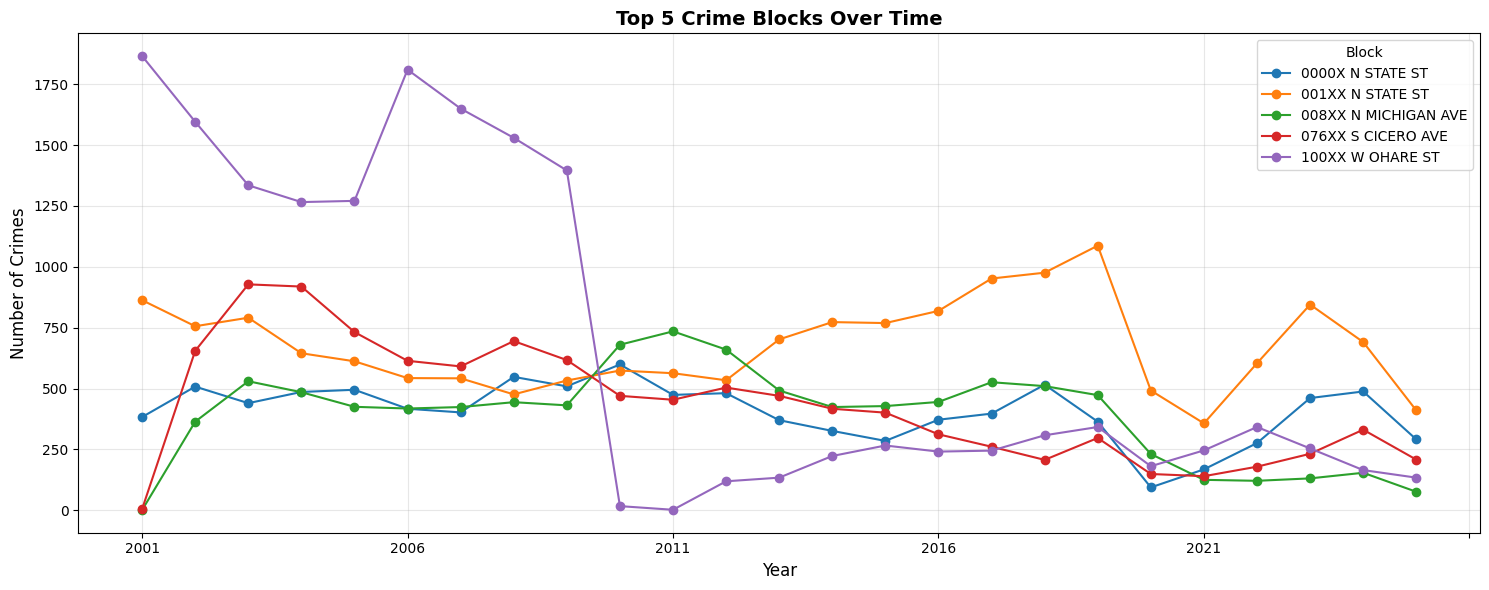

In [138]:
top_blocks = df['Block'].value_counts().head(5).index

block_trend = df[df['Block'].isin(top_blocks)].groupby(['year', 'Block']).size().unstack()

plt.figure(figsize=(15, 6))
block_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Top 5 Crime Blocks Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.legend(title="Block", fontsize=10)
plt.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

<h2 style="font-style: italic;">Insight:</h2>
<h3>The top 5 crime blocks—those with the highest incident counts—remain consistently active across years, often located in densely populated or commercially active zones; while some blocks show gradual declines, others maintain high volumes, suggesting persistent hotspots that require sustained attention through environmental design, community engagement, and location-specific enforcement strategies to disrupt long-term crime patterns.</h3>
<hr>